In [ ]:
#######################################################################################
# Project "Developing predictive models for COVID-19 diagnosis in paediatric patients: 
#          A case study about the potentials of Machine Learning in Public Health"
#          By Anna Mas-Casadesús (https://github.com/amascasadesus)
#          July 2020
#
#          Notebook 6/6
#######################################################################################

### Import basic modules & datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import grid
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.graph_objs as go 
import plotly.offline as py
import plotly.tools as tls
import warnings
from warnings import simplefilter
warnings.filterwarnings('ignore')
simplefilter(action='ignore', category=FutureWarning)

In [2]:
Xsel_train = pd.read_csv('symptoms_paediatric_pp2_Xsel_train.csv')
ysel_train = pd.read_csv('symptoms_paediatric_pp2_ysel_train.csv')
Xsel_test = pd.read_csv('symptoms_paediatric_pp2_Xsel_test.csv')
ysel_test = pd.read_csv('symptoms_paediatric_pp2_ysel_test.csv')
Xsel_trainres = pd.read_csv('symptoms_paediatric_pp2_Xsel_trainres.csv')
ysel_trainres = pd.read_csv('symptoms_paediatric_pp2_ysel_trainres.csv')
Xsel_testres = pd.read_csv('symptoms_paediatric_pp2_Xsel_testres.csv')
ysel_testres = pd.read_csv('symptoms_paediatric_pp2_ysel_testres.csv')
# Non-standardised data for DT visualisations:
Xselns_train = pd.read_csv('symptoms_paediatric_pp2_Xselns_train.csv')
yselns_train = pd.read_csv('symptoms_paediatric_pp2_yselns_train.csv')
Xselns_test = pd.read_csv('symptoms_paediatric_pp2_Xselns_test.csv')
yselns_test = pd.read_csv('symptoms_paediatric_pp2_yselns_test.csv')
Xselns_trainres = pd.read_csv('symptoms_paediatric_pp2_Xselns_trainres.csv')
yselns_trainres = pd.read_csv('symptoms_paediatric_pp2_yselns_trainres.csv')
Xselns_testres = pd.read_csv('symptoms_paediatric_pp2_Xselns_testres.csv')
yselns_testres = pd.read_csv('symptoms_paediatric_pp2_yselns_testres.csv')
# Create checkpoints:
Xsel_train = Xsel_train.copy()
ysel_train = ysel_train.copy()
Xsel_test = Xsel_test.copy()
ysel_test = ysel_test.copy()
Xsel_trainres = Xsel_trainres.copy()
ysel_trainres = ysel_trainres.copy()
Xsel_testres = Xsel_testres.copy()
ysel_testres = ysel_testres.copy()
Xselns_train = Xselns_train.copy()
yselns_train = yselns_train.copy()
Xselns_test = Xselns_test.copy()
yselns_test = yselns_test.copy()
Xselns_trainres = Xselns_trainres.copy()
yselns_trainres = yselns_trainres.copy()
Xselns_testres = Xselns_trainres.copy()
yselns_testres = yselns_testres.copy()

### Models definition

 - **Oversampled Model** best parameters = {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
 - **Original Model** best parameters = {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8}

#### RF definition 

In [3]:
# OV model definition
from sklearn.ensemble import RandomForestClassifier
rfmodel_ov = RandomForestClassifier(criterion='gini',
                                    max_depth=2,
                                    min_samples_leaf=2,
                                    min_samples_split=2,
                                    random_state=42)
rfmodel_ov.fit(Xsel_trainres, ysel_trainres)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

In [4]:
# OV predictions 
yselrf_trainres = rfmodel_ov.predict(Xsel_trainres)

In [5]:
# OR model definition
rfmodel_or = RandomForestClassifier(criterion='entropy',
                                    max_depth=3,
                                    min_samples_leaf=3,
                                    min_samples_split=8,
                                    random_state=42)
rfmodel_or.fit(Xsel_train, ysel_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=8, random_state=42)

In [6]:
# OR predictions 
yselrf_train = rfmodel_or.predict(Xsel_train)

#### DT definition

In [7]:
# OV
from sklearn.tree import DecisionTreeClassifier
dtmodel_ov = DecisionTreeClassifier(random_state=42)
dtmodel_ov.fit(Xsel_trainres, yselrf_trainres)

DecisionTreeClassifier(random_state=42)

In [8]:
# OR
dtmodel_or = DecisionTreeClassifier(random_state=42)
dtmodel_or.fit(Xsel_train, yselrf_train)

DecisionTreeClassifier(random_state=42)

#### DT definition: Non-standardised

In [9]:
# OV
dtmodelns_ov = DecisionTreeClassifier(random_state=42)
dtmodelns_ov.fit(Xselns_trainres, yselrf_trainres)

DecisionTreeClassifier(random_state=42)

In [10]:
# OR
dtmodelns_or = DecisionTreeClassifier(random_state=42)
dtmodelns_or.fit(Xselns_train, yselrf_train)

DecisionTreeClassifier(random_state=42)

### Decision Trees figures

In [11]:
# Get features names 
Xsel_train.columns

Index(['gender', 'underlying_conditions', 'immunosupressed', 'pid_sid',
       'admission_picu', 'respiratory', 'gastrointestinal', 'fever', 'cxr',
       'pneumonia', 'oxigen', 'antibiotics', 'corticoids', 'age_std',
       'neutrocytes_mice_std', 'lymphocytes_mice_std', 'crp_mice_std',
       'diagnosis_delay_mice_std'],
      dtype='object')

In [12]:
# Define features and class names 
featurenames = ['gender', 'preconditions', 'immunosupressed', 'pidsid',
       'admpicu', 'respiratory', 'gastrointestinal', 'fever', 'cxr',
       'pneumonia', 'oxigen', 'antibiotics', 'corticoids', 'age',
       'neutrocytes', 'lymphocytes', 'crp',
       'diagnosisdelay']
classnames = ['CovidNeg','CovidPos']

#### OV model

In [13]:
# Standardised train
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dtmodel_ov, 
                                out_file=None,  
                                feature_names=featurenames,
                                class_names=classnames, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_ov',view=True)

'dtree_ov.pdf'

In [14]:
# Non-standardised
dot_data = tree.export_graphviz(dtmodelns_ov, 
                                out_file=None,  
                                feature_names=featurenames,
                                class_names=classnames, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_ovns',view=True)

'dtree_ovns.pdf'

#### OR model

In [15]:
# Standardised
dot_data = tree.export_graphviz(dtmodel_or, 
                                out_file=None,  
                                feature_names=featurenames,
                                class_names=classnames, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_or',view=True)

'dtree_or4.pdf'

In [16]:
# Non-standardised
dot_data = tree.export_graphviz(dtmodelns_or, 
                                out_file=None,  
                                feature_names=featurenames,
                                class_names=classnames, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_orns',view=True)

'dtree_orns.pdf'

### Feature importance

The Global Surrogate Method is good for looking at an interpretable model that can explain predictions for a black-box approach. However, this will not work well if we want to understand how a single prediction was made for a given observation.

How can we do that? **SHapley Additive exPlanations or SHAP values** are a great tool amongst others like LIME, InterpretML, or ELI5. A SHAP value is the average of the marginal contributions across all permutations (loss function in the context of machine learning - i.e. the difference between the actual value and the predictions). 

Three benefits of SHAP values:
 - 1st. Global interpretability — the collective SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. 
 - 2nd. Local interpretability — each observation gets its own set of SHAP values. We can explain why a case receives its prediction and the contributions of the predictors. 
 - 3rd. SHAP values can be calculated for any tree-based model, while other methods use linear regression or logistic regression models as the surrogate models.
 
References:

* https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
* https://www.analyticsvidhya.com/blog/2019/08/decoding-black-box-step-by-step-guide-interpretable-machine-learning-models-python/?utm_source=blog&utm_medium=decision-tree-vs-random-forest-algorithm

#### OV model

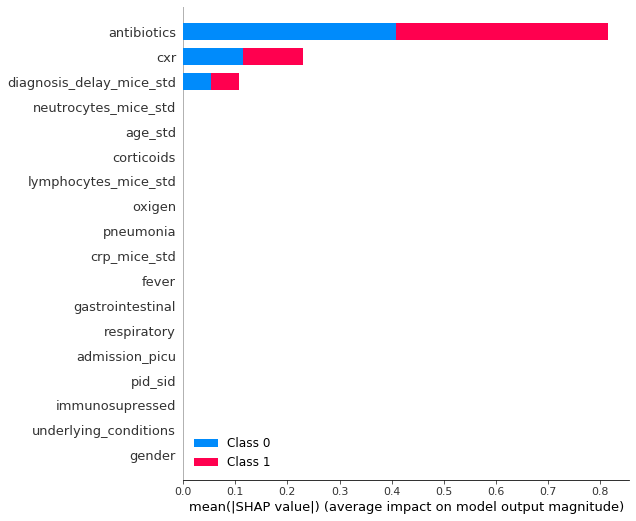

In [17]:
# OV model - Feature Importance Plot: Global Interpretability
#conda install -c conda-forge shap
import shap
shap_values_dtov = shap.TreeExplainer(dtmodel_ov).shap_values(Xsel_trainres)
shap.summary_plot(shap_values_dtov, Xsel_trainres, plot_type="bar")

In [18]:
# OV model - Individual SHAP Value Plot — Local Interpretability 
X_output_dtov = Xsel_test.copy()
X_output_dtov.loc[:,'predict'] = np.round(dtmodel_ov.predict(X_output_dtov),2)
explainer_dtov = shap.TreeExplainer(dtmodel_ov)

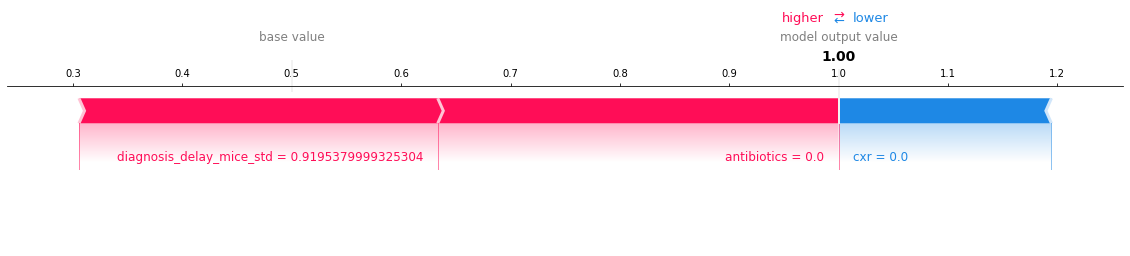

In [19]:
# OV model - Individual SHAP Value Plot — Local Interpretability (Case 0 pos)
choosen_instance_dtov0 = X_output_dtov.loc[[0]]
shap_values_dtov0 = explainer_dtov.shap_values(choosen_instance_dtov0)
shap.initjs()
shap.force_plot(explainer_dtov.expected_value[1], shap_values_dtov0[1], choosen_instance_dtov0, 
                show=True, matplotlib=True) 

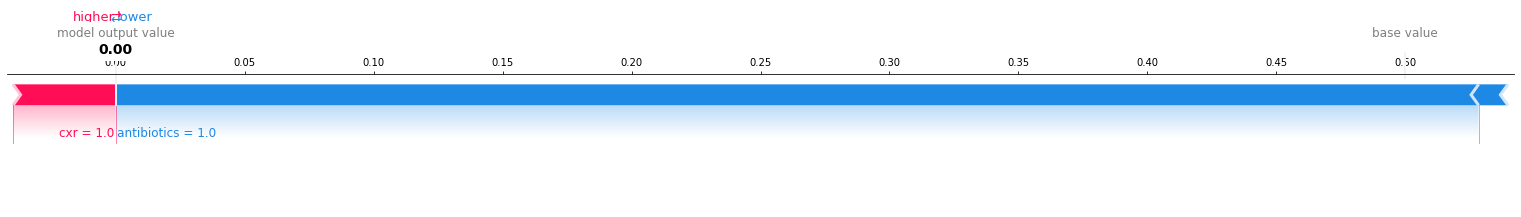

In [20]:
# OV model - Individual SHAP Value Plot — Local Interpretability (Case 10 neg)
choosen_instance_dtov10 = X_output_dtov.loc[[10]]
shap_values_dtov10 = explainer_dtov.shap_values(choosen_instance_dtov10)
shap.initjs()
shap.force_plot(explainer_dtov.expected_value[1], shap_values_dtov10[1], choosen_instance_dtov10, 
                show=True, matplotlib=True, figsize=[27,2.5]) 

#### OV model: Non-standardised

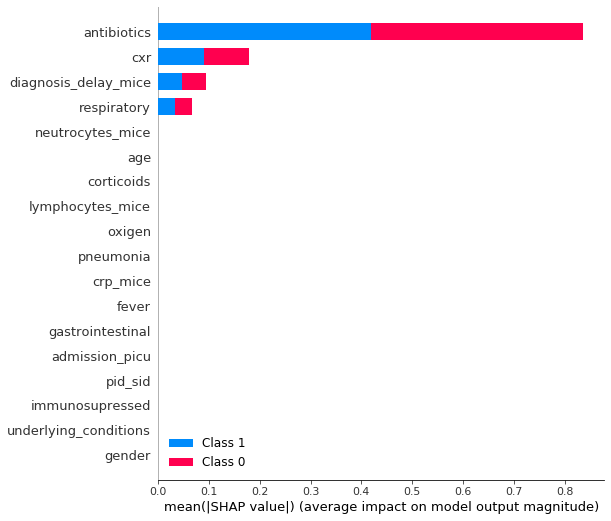

In [21]:
# OV model - Feature Importance Plot: Global Interpretability
shap_values_dtovns = shap.TreeExplainer(dtmodelns_ov).shap_values(Xselns_trainres)
shap.summary_plot(shap_values_dtovns, Xselns_trainres, plot_type="bar")

In [22]:
# OV model - Individual SHAP Value Plot — Local Interpretability 
X_output_dtovns = Xselns_test.copy()
X_output_dtovns.loc[:,'predict'] = np.round(dtmodelns_ov.predict(X_output_dtovns),2)
explainer_dtovns = shap.TreeExplainer(dtmodelns_ov)

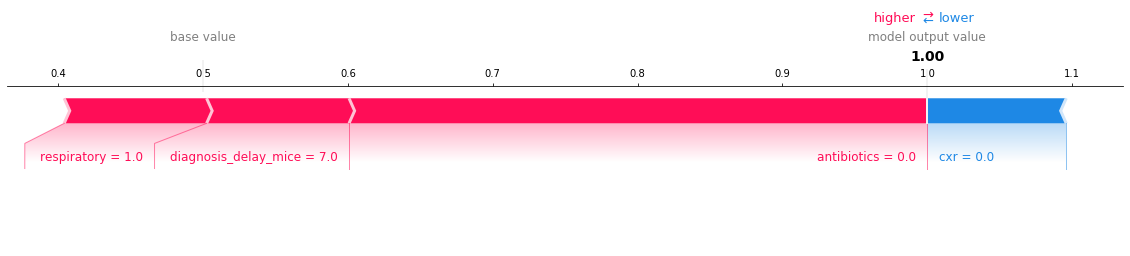

In [23]:
# OV model - Individual SHAP Value Plot — Local Interpretability (Case 0 pos)
choosen_instance_dtovns0 = X_output_dtovns.loc[[0]]
shap_values_dtovns0 = explainer_dtovns.shap_values(choosen_instance_dtovns0)
shap.initjs()
shap.force_plot(explainer_dtovns.expected_value[1], shap_values_dtovns0[1], choosen_instance_dtovns0, 
                show=True, matplotlib=True) 

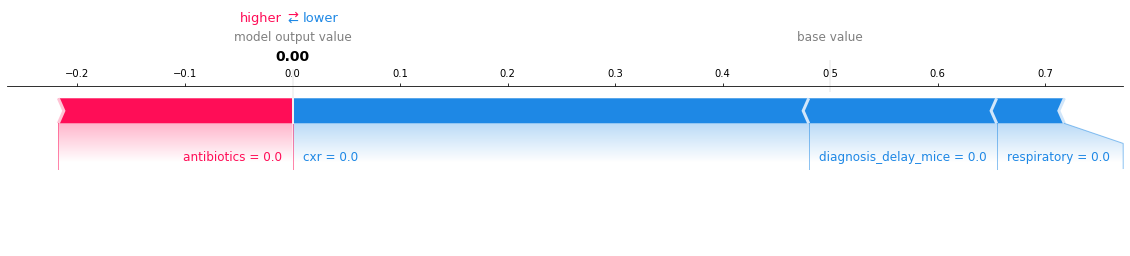

In [24]:
# OV model - Individual SHAP Value Plot — Local Interpretability (Case 11 neg)
choosen_instance_dtovns11 = X_output_dtovns.loc[[11]]
shap_values_dtovns11 = explainer_dtovns.shap_values(choosen_instance_dtovns11)
shap.initjs()
shap.force_plot(explainer_dtovns.expected_value[1], shap_values_dtovns11[1], choosen_instance_dtovns11, 
                show=True, matplotlib=True)#, figsize=[27,2.5]) 

#### OR model

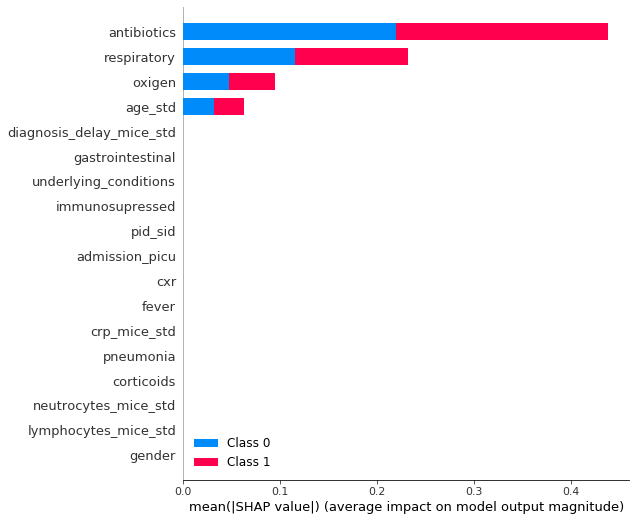

In [25]:
# OR model - Feature Importance Plot: Global Interpretability
#conda install -c conda-forge shap
shap_values_dtor = shap.TreeExplainer(dtmodel_or).shap_values(Xsel_train)
shap.summary_plot(shap_values_dtor, Xsel_train, plot_type="bar")

In [26]:
# OR model - Individual SHAP Value Plot — Local Interpretability 
X_output_dtor = Xsel_test.copy()
X_output_dtor.loc[:,'predict'] = np.round(dtmodel_or.predict(X_output_dtor),2)
explainer_dtor = shap.TreeExplainer(dtmodel_or)

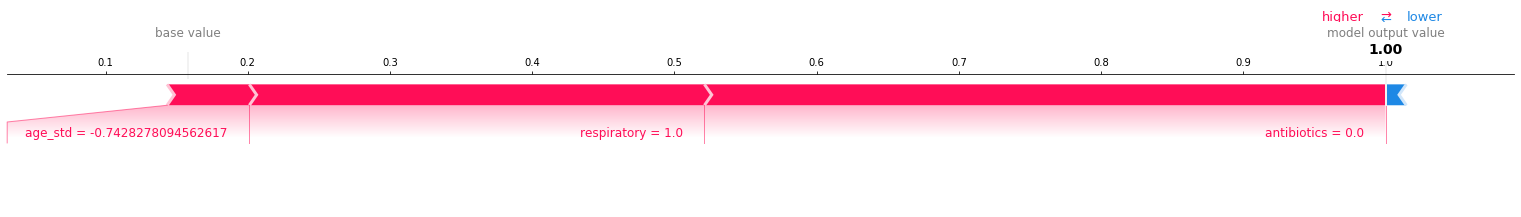

In [27]:
# OR model - Individual SHAP Value Plot — Local Interpretability (Case 28 pos)
choosen_instance_dtor28 = X_output_dtor.loc[[28]]
shap_values_dtor28 = explainer_dtor.shap_values(choosen_instance_dtor28)
shap.initjs()
shap.force_plot(explainer_dtor.expected_value[1], shap_values_dtor28[1], choosen_instance_dtor28, 
                show=True, matplotlib=True, figsize=[27,2.5]) 

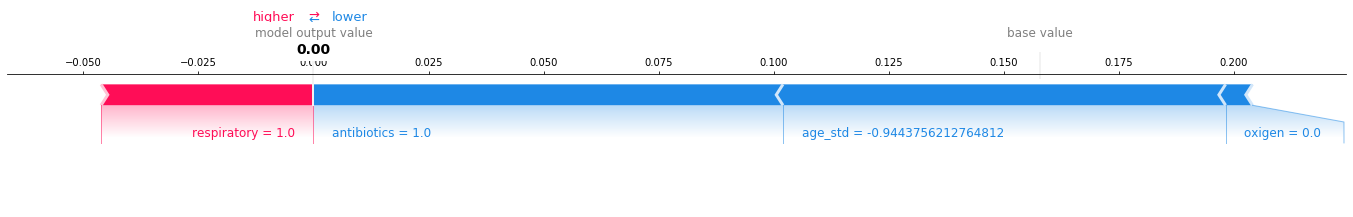

In [28]:
# OR model - Individual SHAP Value Plot — Local Interpretability (Case 10 neg)
choosen_instance_dtor10 = X_output_dtor.loc[[10]]
shap_values_dtor10 = explainer_dtor.shap_values(choosen_instance_dtor10)
shap.initjs()
shap.force_plot(explainer_dtor.expected_value[1], shap_values_dtor10[1], choosen_instance_dtor10, 
                show=True, matplotlib=True, figsize=[24,2.5])

#### OR model: Non-standardised

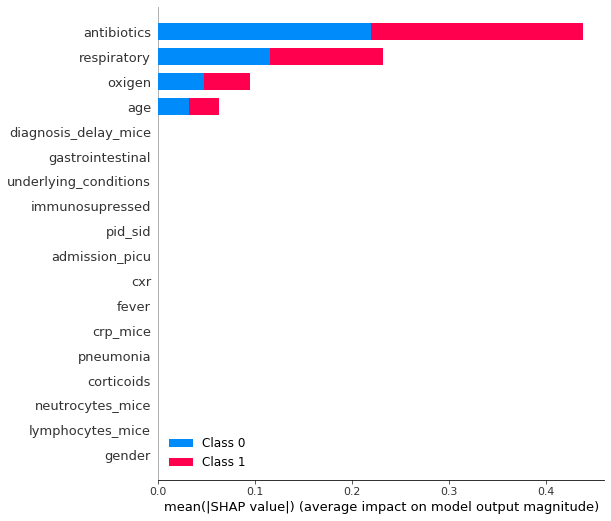

In [29]:
# OR model - Feature Importance Plot: Global Interpretability
shap_values_dtorns = shap.TreeExplainer(dtmodelns_or).shap_values(Xselns_train)
shap.summary_plot(shap_values_dtorns, Xselns_train, plot_type="bar")

In [30]:
# OR model - Individual SHAP Value Plot — Local Interpretability 
X_output_dtorns = Xselns_test.copy()
X_output_dtorns.loc[:,'predict'] = np.round(dtmodelns_or.predict(X_output_dtorns),2)
explainer_dtorns = shap.TreeExplainer(dtmodelns_or)

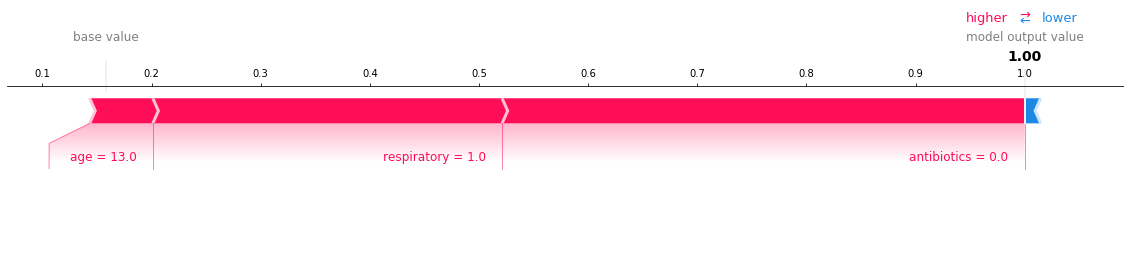

In [31]:
# OR model - Individual SHAP Value Plot — Local Interpretability (Case 15 pos)
choosen_instance_dtorns15 = X_output_dtorns.loc[[15]]
shap_values_dtorns15 = explainer_dtorns.shap_values(choosen_instance_dtorns15)
shap.initjs()
shap.force_plot(explainer_dtorns.expected_value[1], shap_values_dtorns15[1], choosen_instance_dtorns15, 
                show=True, matplotlib=True) 

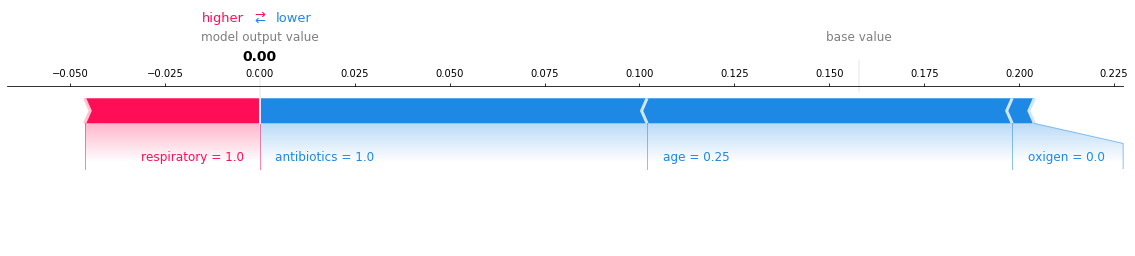

In [32]:
# OR model - Individual SHAP Value Plot — Local Interpretability (Case 10 neg)
choosen_instance_dtorns10 = X_output_dtorns.loc[[10]]
shap_values_dtorns10 = explainer_dtorns.shap_values(choosen_instance_dtorns10)
shap.initjs()
shap.force_plot(explainer_dtorns.expected_value[1], shap_values_dtorns10[1], choosen_instance_dtorns10, 
                show=True, matplotlib=True)